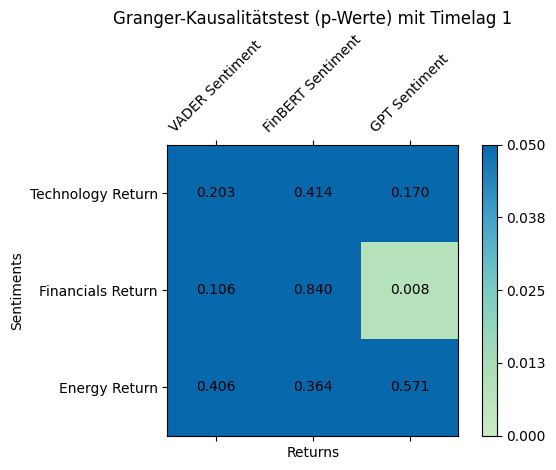

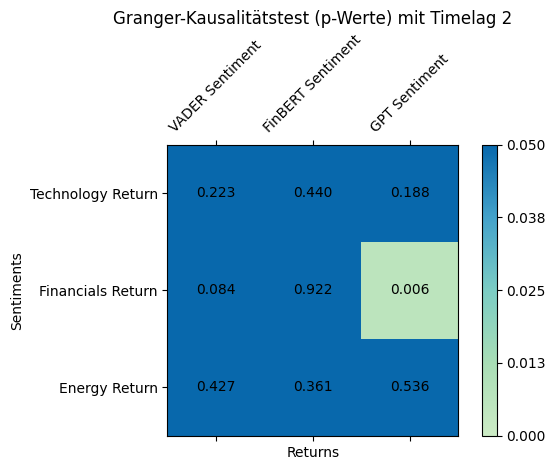

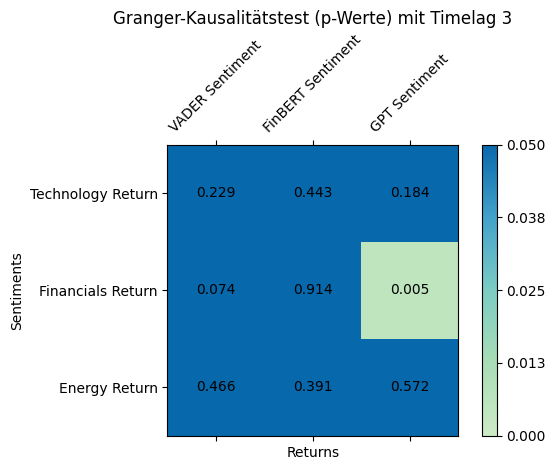

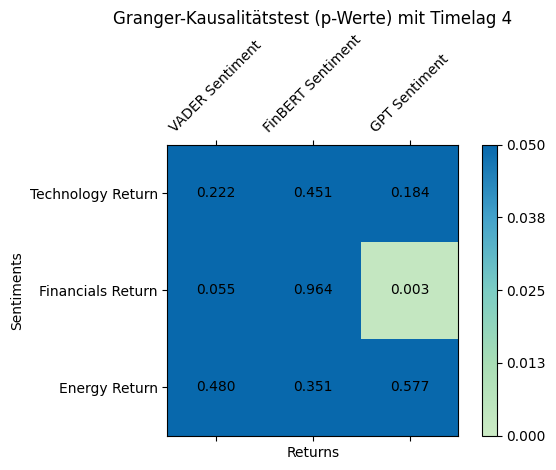

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import grangercausalitytests

# Load data
sentiment_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Combine sentiment data and merge datasets on Date
merged_data = sentiment_financials.merge(sentiment_energy, on='Date', suffixes=('_financials', '_energy'))
merged_data = merged_data.merge(sentiment_technology, on='Date')
merged_data = merged_data.merge(returns_data, on='Date')

# List of sentiments and returns
sentiments = {
    'Financials': ['VADER Sentiment_financials', 'FinBERT Sentiment_financials', 'GPT Sentiment_financials'],
    'Energy': ['VADER Sentiment_energy', 'FinBERT Sentiment_energy', 'GPT Sentiment_energy'],
    'Technology': ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
}
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# List of considered timelags
timelags = [1, 2, 3, 4]

# Funktion, um den Granger-Kausalitätstest für ein bestimmtes Timelag durchzuführen
def granger_causality_test(sentiment, return_column, lag):
    test_result = grangercausalitytests(merged_data[[sentiment + '_smoothed', return_column]], maxlag=lag, verbose=False)
    p_value = test_result[lag][0]['ssr_ftest'][1]
    return p_value

# Function for exponential smoothing and Granger causality test
def perform_analysis(sentiments, return_column):
    # Exponential Smoothing for the sentiments
    for sector, sentiment_list in sentiments.items():
        for sentiment in sentiment_list:
            model = ExponentialSmoothing(merged_data[sentiment], trend='add')
            fit = model.fit()
            merged_data[sentiment + '_smoothed'] = fit.fittedvalues
    
    # Granger causality test for the smoothed sentiments and the returns with different timelags
    results_timelag = {}
    for lag in timelags:
        results_timelag[lag] = {}
        for sector, sentiment_list in sentiments.items():
            results_timelag[lag][sector] = {}
            for sentiment in sentiment_list:
                p_value = granger_causality_test(sentiment, return_column, lag)
                results_timelag[lag][sector][return_column] = p_value

# Call the analysis for each return category
for return_column in returns:
    perform_analysis(sentiments, return_column)


# Custom colormap with more subtle green and red colors
colors = ['#ccebc5', '#a8ddb5', '#7bccc4', '#43a2ca', '#0868ac']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Ergebnisse in Matrixgrafiken für jedes Timelag ausgeben
for lag in timelags:
    fig, ax = plt.subplots()
    matrix = pd.DataFrame(results_timelag[lag])
    cax = ax.matshow(matrix, cmap=cmap, vmin=0, vmax=0.05)
    fig.colorbar(cax, ticks=np.linspace(0, 0.05, len(colors)), format='%.3f')

    # Anpassungen für die Matrix
    plt.xticks(np.arange(len(matrix.columns)), matrix.columns, rotation=45)
    plt.yticks(np.arange(len(matrix.index)), matrix.index)

    # Ergänze Werte in der Matrix
    for i in range(len(matrix.index)):
        for j in range(len(matrix.columns)):
            p_value = matrix.iloc[i, j]
            color = cmap(p_value / 0.05)
            plt.text(j, i, f"{p_value:.3f}", color='black', ha='center', va='center')

    plt.xlabel('Returns')
    plt.ylabel('Sentiments')
    plt.title(f'Granger-Kausalitätstest (p-Werte) mit Timelag {lag}')
    plt.tight_layout()
    plt.show()




0
   VADER Sentiment_financials_smoothed_ewma  Technology Return_lag_1
5                                  0.412706                -0.003568
6                                  0.408079                -0.002841
7                                  0.404746                -0.002114
8                                  0.408866                -0.001387
9                                  0.412131                 0.010880
   VADER Sentiment_financials_smoothed_ewma  Technology Return_lag_1
5                                  0.412706                -0.003568
6                                  0.408079                -0.002841
7                                  0.404746                -0.002114
8                                  0.408866                -0.001387
9                                  0.412131                 0.010880
   VADER Sentiment_financials_smoothed_ewma  Technology Return_lag_1
5                                  0.412706                -0.003568
6                               

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    FinBERT Sentiment_financials_smoothed_ewma  Technology Return_lag_2
6                                     0.280702                -0.003568
7                                     0.271992                -0.002841
8                                     0.275002                -0.002114
9                                     0.280686                -0.001387
10                                    0.276840                 0.010880
    FinBERT Sentiment_financials_smoothed_ewma  Technology Return_lag_2
6                                     0.280702                -0.003568
7                                     0.271992                -0.002841
8                                     0.275002                -0.002114
9                                     0.280686                -0.001387
10                                    0.276840                 0.010880
    FinBERT Sentiment_financials_smoothed_ewma  Technology Return_lag_2
6                                     0.280702                -0

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    GPT Sentiment_financials_smoothed_ewma  Technology Return_lag_3
7                                 0.515861                -0.003568
8                                 0.515710                -0.002841
9                                 0.515551                -0.002114
10                                0.515385                -0.001387
11                                0.515212                 0.010880
    GPT Sentiment_financials_smoothed_ewma  Technology Return_lag_3
7                                 0.515861                -0.003568
8                                 0.515710                -0.002841
9                                 0.515551                -0.002114
10                                0.515385                -0.001387
11                                0.515212                 0.010880
    GPT Sentiment_financials_smoothed_ewma  Technology Return_lag_3
7                                 0.515861                -0.003568
8                                 0.515710      

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    GPT Sentiment_energy_smoothed_ewma  Technology Return_lag_2
6                             0.306748                -0.003568
7                             0.306554                -0.002841
8                             0.306346                -0.002114
9                             0.306125                -0.001387
10                            0.305894                 0.010880
    GPT Sentiment_energy_smoothed_ewma  Technology Return_lag_2
6                             0.306748                -0.003568
7                             0.306554                -0.002841
8                             0.306346                -0.002114
9                             0.306125                -0.001387
10                            0.305894                 0.010880
    GPT Sentiment_energy_smoothed_ewma  Technology Return_lag_2
6                             0.306748                -0.003568
7                             0.306554                -0.002841
8                             0.306346  

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    VADER Sentiment_smoothed_ewma  Technology Return_lag_3
7                        0.446345                -0.003568
8                        0.440097                -0.002841
9                        0.436494                -0.002114
10                       0.434820                -0.001387
11                       0.439499                 0.010880
    VADER Sentiment_smoothed_ewma  Technology Return_lag_4
8                        0.440097                -0.003568
9                        0.436494                -0.002841
10                       0.434820                -0.002114
11                       0.439499                -0.001387
12                       0.443948                 0.010880
    VADER Sentiment_smoothed_ewma  Technology Return_lag_4
8                        0.440097                -0.003568
9                        0.436494                -0.002841
10                       0.434820                -0.002114
11                       0.439499                -0.0013

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   GPT Sentiment_smoothed_ewma  Technology Return_lag_1
5                     0.506321                -0.003568
6                     0.505105                -0.002841
7                     0.503996                -0.002114
8                     0.504256                -0.001387
9                     0.503698                 0.010880
   GPT Sentiment_smoothed_ewma  Technology Return_lag_1
5                     0.506321                -0.003568
6                     0.505105                -0.002841
7                     0.503996                -0.002114
8                     0.504256                -0.001387
9                     0.503698                 0.010880
   GPT Sentiment_smoothed_ewma  Technology Return_lag_1
5                     0.506321                -0.003568
6                     0.505105                -0.002841
7                     0.503996                -0.002114
8                     0.504256                -0.001387
9                     0.503698                 0

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    FinBERT Sentiment_financials_smoothed_ewma  Financials Return_lag_4
8                                     0.275002                 0.012068
9                                     0.280686                 0.008204
10                                    0.276840                 0.004340
11                                    0.278722                 0.000477
12                                    0.299680                 0.010177
    FinBERT Sentiment_financials_smoothed_ewma  Financials Return_lag_4
8                                     0.275002                 0.012068
9                                     0.280686                 0.008204
10                                    0.276840                 0.004340
11                                    0.278722                 0.000477
12                                    0.299680                 0.010177
    FinBERT Sentiment_financials_smoothed_ewma  Financials Return_lag_4
8                                     0.275002                 0

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   VADER Sentiment_energy_smoothed_ewma  Financials Return_lag_1
5                              0.262973                 0.012068
6                              0.262905                 0.008204
7                              0.262830                 0.004340
8                              0.262751                 0.000477
9                              0.262666                 0.010177
   VADER Sentiment_energy_smoothed_ewma  Financials Return_lag_1
5                              0.262973                 0.012068
6                              0.262905                 0.008204
7                              0.262830                 0.004340
8                              0.262751                 0.000477
9                              0.262666                 0.010177
   VADER Sentiment_energy_smoothed_ewma  Financials Return_lag_1
5                              0.262973                 0.012068
6                              0.262905                 0.008204
7                        

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    GPT Sentiment_energy_smoothed_ewma  Financials Return_lag_3
7                             0.306554                 0.012068
8                             0.306346                 0.008204
9                             0.306125                 0.004340
10                            0.305894                 0.000477
11                            0.305655                 0.010177
    GPT Sentiment_energy_smoothed_ewma  Financials Return_lag_3
7                             0.306554                 0.012068
8                             0.306346                 0.008204
9                             0.306125                 0.004340
10                            0.305894                 0.000477
11                            0.305655                 0.010177
    GPT Sentiment_energy_smoothed_ewma  Financials Return_lag_3
7                             0.306554                 0.012068
8                             0.306346                 0.008204
9                             0.306125  

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   FinBERT Sentiment_smoothed_ewma  Financials Return_lag_1
5                         0.245380                 0.012068
6                         0.248338                 0.008204
7                         0.240128                 0.004340
8                         0.235498                 0.000477
9                         0.235768                 0.010177
   FinBERT Sentiment_smoothed_ewma  Financials Return_lag_1
5                         0.245380                 0.012068
6                         0.248338                 0.008204
7                         0.240128                 0.004340
8                         0.235498                 0.000477
9                         0.235768                 0.010177
   FinBERT Sentiment_smoothed_ewma  Financials Return_lag_1
5                         0.245380                 0.012068
6                         0.248338                 0.008204
7                         0.240128                 0.004340
8                         0.235498      

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    VADER Sentiment_financials_smoothed_ewma  Energy Return_lag_4
8                                   0.408866             0.014262
9                                   0.412131             0.008481
10                                  0.413838             0.002701
11                                  0.413595            -0.003080
12                                  0.420486             0.036920
    VADER Sentiment_financials_smoothed_ewma  Energy Return_lag_4
8                                   0.408866             0.014262
9                                   0.412131             0.008481
10                                  0.413838             0.002701
11                                  0.413595            -0.003080
12                                  0.420486             0.036920
    VADER Sentiment_financials_smoothed_ewma  Energy Return_lag_4
8                                   0.408866             0.014262
9                                   0.412131             0.008481
10        

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   GPT Sentiment_financials_smoothed_ewma  Energy Return_lag_1
5                                0.516129             0.014262
6                                0.516001             0.008481
7                                0.515861             0.002701
8                                0.515710            -0.003080
9                                0.515551             0.036920
   GPT Sentiment_financials_smoothed_ewma  Energy Return_lag_1
5                                0.516129             0.014262
6                                0.516001             0.008481
7                                0.515861             0.002701
8                                0.515710            -0.003080
9                                0.515551             0.036920
   GPT Sentiment_financials_smoothed_ewma  Energy Return_lag_1
5                                0.516129             0.014262
6                                0.516001             0.008481
7                                0.515861             0

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    FinBERT Sentiment_energy_smoothed_ewma  Energy Return_lag_4
8                                 0.100071             0.014262
9                                 0.097359             0.008481
10                                0.097280             0.002701
11                                0.100298            -0.003080
12                                0.102657             0.036920
    FinBERT Sentiment_energy_smoothed_ewma  Energy Return_lag_4
8                                 0.100071             0.014262
9                                 0.097359             0.008481
10                                0.097280             0.002701
11                                0.100298            -0.003080
12                                0.102657             0.036920
    FinBERT Sentiment_energy_smoothed_ewma  Energy Return_lag_4
8                                 0.100071             0.014262
9                                 0.097359             0.008481
10                                0.0972

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   VADER Sentiment_smoothed_ewma  Energy Return_lag_1
5                       0.453989             0.014262
6                       0.452721             0.008481
7                       0.446345             0.002701
8                       0.440097            -0.003080
9                       0.436494             0.036920
   VADER Sentiment_smoothed_ewma  Energy Return_lag_1
5                       0.453989             0.014262
6                       0.452721             0.008481
7                       0.446345             0.002701
8                       0.440097            -0.003080
9                       0.436494             0.036920
    VADER Sentiment_smoothed_ewma  Energy Return_lag_2
6                        0.452721             0.014262
7                        0.446345             0.008481
8                        0.440097             0.002701
9                        0.436494            -0.003080
10                       0.434820             0.036920
    VADER Sentiment_sm

/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


    GPT Sentiment_smoothed_ewma  Energy Return_lag_4
8                      0.504256             0.014262
9                      0.503698             0.008481
10                     0.505379             0.002701
11                     0.506712            -0.003080
12                     0.508819             0.036920
    GPT Sentiment_smoothed_ewma  Energy Return_lag_4
8                      0.504256             0.014262
9                      0.503698             0.008481
10                     0.505379             0.002701
11                     0.506712            -0.003080
12                     0.508819             0.036920
4          NaN
5    -0.003568
6    -0.002841
7    -0.002114
8    -0.001387
9     0.010880
10    0.005625
11   -0.022267
12    0.008953
13    0.000926
Name: Technology Return_lag_1, dtype: float64
4     0.409091
5     0.272727
6     0.363636
7     0.636364
8     0.454545
9     0.409091
10    0.363636
11    0.727273
12    0.363636
13    0.500000
Name: VADER Sentim

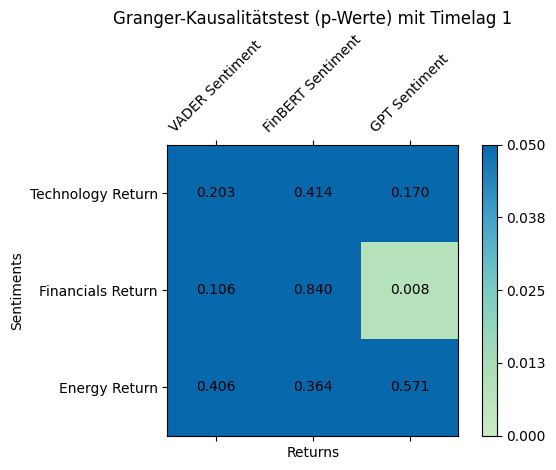

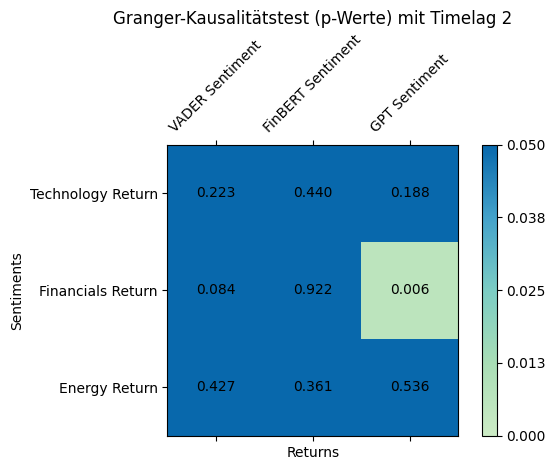

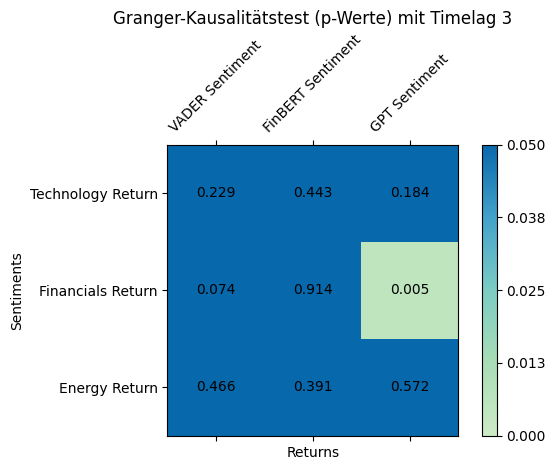

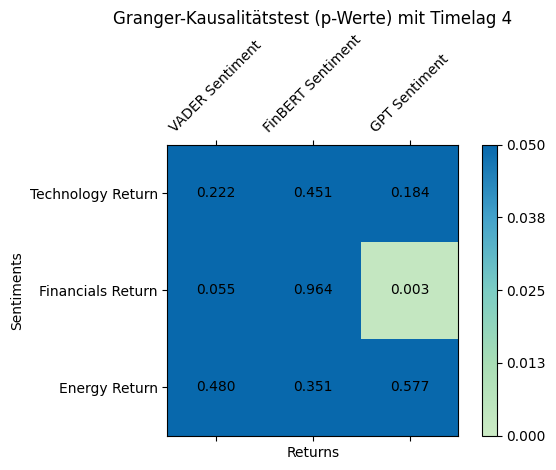

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import grangercausalitytests

# Load data
sentiment_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Combine sentiment data and merge datasets on Date
merged_data = sentiment_financials.merge(sentiment_energy, on='Date', suffixes=('_financials', '_energy'))
merged_data = merged_data.merge(sentiment_technology, on='Date')
merged_data = merged_data.merge(returns_data, on='Date')

# List of sentiments and returns
sentiments = {
    'Financials': ['VADER Sentiment_financials', 'FinBERT Sentiment_financials', 'GPT Sentiment_financials'],
    'Energy': ['VADER Sentiment_energy', 'FinBERT Sentiment_energy', 'GPT Sentiment_energy'],
    'Technology': ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
}
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# List of considered timelags
timelags = [1, 2, 3, 4]

from sklearn.preprocessing import MinMaxScaler

# Additional Preprocessing

def add_lagged_returns(data, returns_column, lags):
    for lag in lags:
        data[f'{returns_column}_lag_{lag}'] = data[returns_column].shift(lag)
    return data

def add_ewma(data, columns, span=5):
    for col in columns:
        data[f'{col}_ewma'] = data[col].ewm(span=span).mean()
    return data

def add_difference(data, columns):
    for col in columns:
        data[f'{col}_diff'] = data[col].diff()
    return data

def add_scaling(data, columns):
    scaler = MinMaxScaler()
    data[columns] = scaler.fit_transform(data[columns])
    return data

# Preprocess data
for return_column in returns:
    merged_data = add_lagged_returns(merged_data, return_column, timelags)
merged_data = add_ewma(merged_data, sentiments['Financials'] + sentiments['Energy'] + sentiments['Technology'])
merged_data = add_difference(merged_data, sentiments['Financials'] + sentiments['Energy'] + sentiments['Technology'])
merged_data = add_scaling(merged_data, sentiments['Financials'] + sentiments['Energy'] + sentiments['Technology'])

# Remove rows with NaN values
merged_data = merged_data.dropna()


def granger_causality_test(sentiment, return_column, lag, merged_data):

    columns_to_test = [sentiment, return_column]
    merged_data[columns_to_test] = merged_data[columns_to_test].replace([np.inf, -np.inf], np.nan)
    merged_data = merged_data.dropna(subset=columns_to_test)

    if merged_data[columns_to_test].isna().any().any() or np.isinf(merged_data[columns_to_test]).any().any():
        print(f"Found NaN or inf values in the following columns: {sentiment}, {return_column}")
        print(merged_data[columns_to_test].head()) # Show some statistics to help identify the issue
    test_result = grangercausalitytests(merged_data[columns_to_test], maxlag=lag, verbose=False)
    p_value = test_result[lag][0]['ssr_ftest'][1]
    print(merged_data[columns_to_test].head())

    return p_value



def check_nan_inf(data):
    nan_count = data.isna().sum().sum()
    inf_count = (np.isinf(data.select_dtypes(include=[np.number]))).sum().sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {nan_count} NaN and {inf_count} infinite values detected.")
        # You might add additional debugging or error handling here

# After each preprocessing step, call:
check_nan_inf(merged_data)


merged_data = merged_data.dropna(subset=[sentiment, return_column])


def perform_analysis(sentiments, return_column, merged_data):
    # Exponential Smoothing for the sentiments
    for sector, sentiment_list in sentiments.items():
        # Correct the smoothed_sentiment variable construction
        for sentiment in sentiment_list:
            smoothed_sentiment_ewma_name = sentiment + '_smoothed_ewma' # Fixed here
            model = ExponentialSmoothing(merged_data[sentiment], trend='add')
            fit = model.fit()
            smoothed_sentiment_name = sentiment + '_smoothed'
            merged_data[smoothed_sentiment_name] = fit.fittedvalues

            # Apply EWMA, differencing, and scaling to smoothed sentiments
            add_ewma(merged_data, [smoothed_sentiment_name]) # Applying EWMA
            smoothed_sentiment_ewma_name = smoothed_sentiment_name + '_ewma'
            merged_data[smoothed_sentiment_ewma_name + '_diff'] = merged_data[smoothed_sentiment_ewma_name].diff() # Applying differencing
            # Granger causality test for the smoothed and preprocessed sentiments and the returns with different timelags
            results_timelag = {}
            for lag in timelags:
                results_timelag[lag] = {}
                for sector, sentiment_list in sentiments.items():
                    results_timelag[lag][sector] = {}
                    for sentiment in sentiment_list:
                        smoothed_sentiment = sentiment + '_smoothed_ewma_diff' # Changed from '_ewma_diff' to '_smoothed_ewma_diff'
                        lagged_return = f'{return_column}_lag_{lag}'
                        p_value = granger_causality_test(smoothed_sentiment_ewma_name, lagged_return, lag, merged_data)

                        results_timelag[lag][sector][return_column] = p_value



infinite_values_count = 0
for col in merged_data.select_dtypes(include=[np.number]).columns:
    infinite_values_count += np.isinf(merged_data[col]).sum()

print(infinite_values_count)

# Remove rows with NaN values
merged_data = merged_data.dropna()

# Alternatively, fill NaN values
merged_data = merged_data.fillna(method='ffill') # Forward fill

# Preprocess data
for return_column in returns:
    merged_data = add_lagged_returns(merged_data, return_column, timelags)

# Call the analysis for each return category, passing merged_data
for return_column in returns:
    perform_analysis(sentiments, return_column, merged_data)

# ...

print(merged_data["Technology Return_lag_1"].head(10))
print(merged_data["VADER Sentiment_financials"].head(10))
print(merged_data.index)
merged_data.dropna(subset=["VADER Sentiment_financials_smoothed_ewma", "Technology Return_lag_1"], inplace=True)
# Or alternatively fill NaN values
# merged_data.fillna(method='ffill', inplace=True)


# Custom colormap with more subtle green and red colors
colors = ['#ccebc5', '#a8ddb5', '#7bccc4', '#43a2ca', '#0868ac']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Ergebnisse in Matrixgrafiken für jedes Timelag ausgeben
for lag in timelags:
    fig, ax = plt.subplots()
    matrix = pd.DataFrame(results_timelag[lag])
    cax = ax.matshow(matrix, cmap=cmap, vmin=0, vmax=0.05)
    fig.colorbar(cax, ticks=np.linspace(0, 0.05, len(colors)), format='%.3f')

    # Anpassungen für die Matrix
    plt.xticks(np.arange(len(matrix.columns)), matrix.columns, rotation=45)
    plt.yticks(np.arange(len(matrix.index)), matrix.index)

    # Ergänze Werte in der Matrix
    for i in range(len(matrix.index)):
        for j in range(len(matrix.columns)):
            p_value = matrix.iloc[i, j]
            color = cmap(p_value / 0.05)
            plt.text(j, i, f"{p_value:.3f}", color='black', ha='center', va='center')

    plt.xlabel('Returns')
    plt.ylabel('Sentiments')
    plt.title(f'Granger-Kausalitätstest (p-Werte) mit Timelag {lag}')
    plt.tight_layout()
    plt.show()




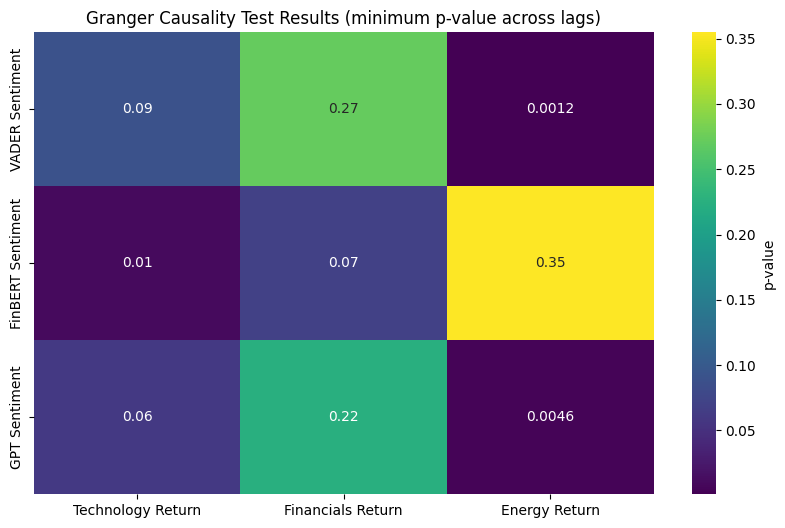

In [87]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

# Load data
sentiment_data_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_data_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_data_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Define the sentiments and returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

def granger_test(sentiment_data, returns_data, sentiment_column, return_column, max_lag=5):
    merged_data = pd.merge(sentiment_data[[sentiment_column, 'Date']], returns_data[[return_column, 'Date']], on='Date')
    data = merged_data[[sentiment_column, return_column]].copy()  # Making an explicit copy

    # Remove Seasonality using seasonal decomposition
    seasonal_decomposition = seasonal_decompose(data[sentiment_column], model='additive', period=3) # Adjust period as per data
    data[sentiment_column] = seasonal_decomposition.resid.dropna()

    seasonal_decomposition = seasonal_decompose(data[return_column], model='additive', period=3)
    data[return_column] = seasonal_decomposition.resid.dropna()

    # Drop any NaN values after seasonal decomposition
    data.dropna(inplace=True)

    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gc_test = grangercausalitytests(data_scaled, max_lag, verbose=False)
    p_values = [gc_test[lag+1][0]['ssr_ftest'][1] for lag in range(max_lag)]
    return p_values


# Define lags to test
max_lag = 7

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(index=sentiments, columns=returns)

# Loop over sentiments and returns to perform Granger Causality test for each combination
for sentiment in sentiments:
    for return_col in returns:
        if 'Technology' in return_col:
            sector_data = sentiment_data_technology
        elif 'Financials' in return_col:
            sector_data = sentiment_data_financials
        elif 'Energy' in return_col:
            sector_data = sentiment_data_energy

        p_values = granger_test(sector_data, returns_data, sentiment, return_col, max_lag=max_lag)
        # Taking the minimum p-value across lags
        results_df.loc[sentiment, return_col] = min(p_values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.astype(float), annot=True, cmap='viridis', cbar_kws={'label': 'p-value'})
plt.title("Granger Causality Test Results (minimum p-value across lags)")
plt.show()


/Users/philippsbresny/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


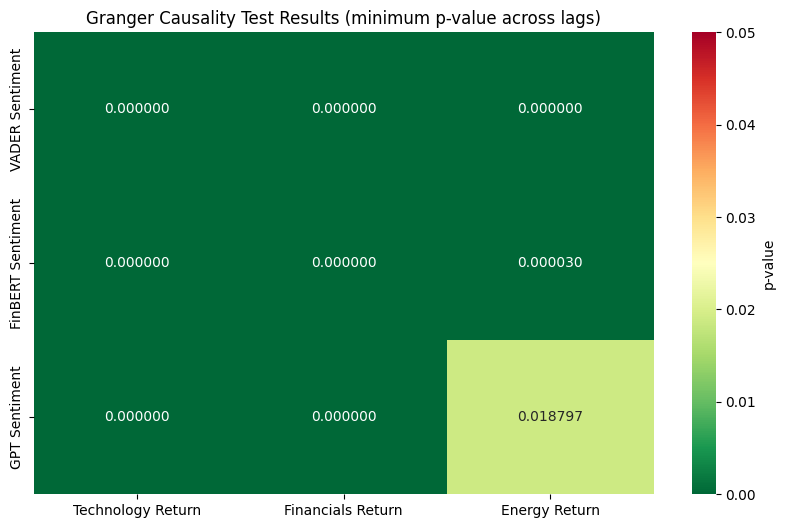

In [125]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from itertools import product

# Load data
sentiment_data_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_data_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_data_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Define the sentiments and returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

def granger_test(sentiment_data, returns_data, sentiment_column, return_column, max_lag=3):
    merged_data = pd.merge(sentiment_data[[sentiment_column, 'Date']], returns_data[[return_column, 'Date']], on='Date')
    data = merged_data[[sentiment_column, return_column]].copy()  # Making an explicit copy

    # Apply Exponential Smoothing
    for column in [sentiment_column, return_column]:
        model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=3)
        fit_model = model.fit()
        data[column] = fit_model.fittedvalues

    # Remove Seasonality using seasonal decomposition
    seasonal_decomposition = seasonal_decompose(data[sentiment_column], model='additive', period=2)
    data[sentiment_column] = seasonal_decomposition.resid.dropna()

    seasonal_decomposition = seasonal_decompose(data[return_column], model='additive', period=2)
    data[return_column] = seasonal_decomposition.resid.dropna()

    # Drop any NaN values after seasonal decomposition
    data.dropna(inplace=True)

    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gc_test = grangercausalitytests(data_scaled, max_lag, verbose=False)
    p_values = [gc_test[lag+1][0]['ssr_ftest'][1] for lag in range(max_lag)]
    return p_values


# Initialize a DataFrame to store the results
results_df = pd.DataFrame(index=sentiments, columns=returns)

# Loop over sentiments and returns to perform Granger Causality test for each combination
for sentiment in sentiments:
    for return_col in returns:
        if 'Technology' in return_col:
            sector_data = sentiment_data_technology
        elif 'Financials' in return_col:
            sector_data = sentiment_data_financials
        elif 'Energy' in return_col:
            sector_data = sentiment_data_energy

        p_values = granger_test(sector_data, returns_data, sentiment, return_col, max_lag=max_lag)
        # Taking the minimum p-value across lags
        results_df.loc[sentiment, return_col] = min(p_values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.astype(float), annot=True, cmap='RdYlGn_r', cbar_kws={'label': 'p-value'}, vmin=0, vmax=0.05, fmt='.6f')
plt.title("Granger Causality Test Results (minimum p-value across lags)")
plt.show()




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.8229  , p=0.0019  , df_denom=358, df_num=1
ssr based chi2 test:   chi2=9.9052  , p=0.0016  , df=1
likelihood ratio test: chi2=9.7717  , p=0.0018  , df=1
parameter F test:         F=9.8229  , p=0.0019  , df_denom=358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.7627 , p=0.0000  , df_denom=355, df_num=2
ssr based chi2 test:   chi2=46.1666 , p=0.0000  , df=2
likelihood ratio test: chi2=43.4374 , p=0.0000  , df=2
parameter F test:         F=22.7627 , p=0.0000  , df_denom=355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.4413  , p=0.0001  , df_denom=352, df_num=3
ssr based chi2 test:   chi2=22.7678 , p=0.0000  , df=3
likelihood ratio test: chi2=22.0750 , p=0.0001  , df=3
parameter F test:         F=7.4413  , p=0.0001  , df_denom=352, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.0363  , p=0.0006  

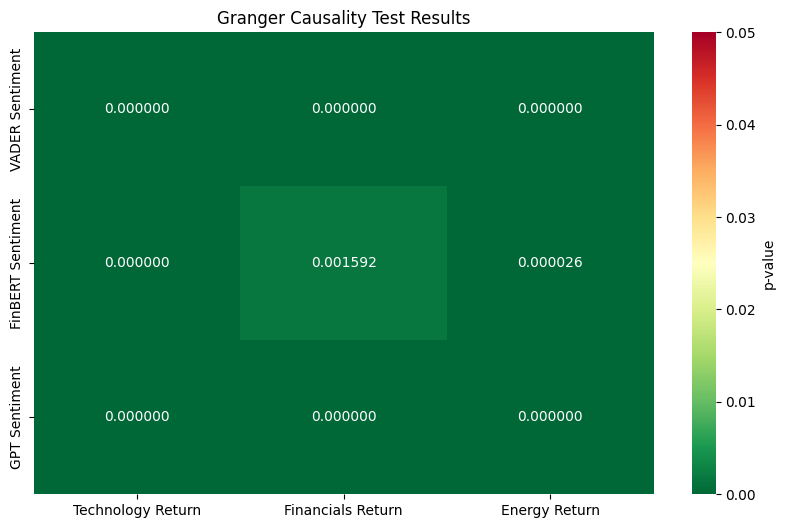

Granger Causality Test Results:
                  Technology Return Financials Return Energy Return
VADER Sentiment            0.000000          0.000000      0.000000
FinBERT Sentiment          0.000000          0.001592      0.000026
GPT Sentiment              0.000000          0.000000      0.000000
Granger Causality Test Results Extended:
                  Technology Return Financials Return Energy Return
VADER Sentiment        1.614412e-19      8.287473e-08  8.452757e-18
FinBERT Sentiment      1.864996e-11      1.591650e-03  2.625384e-05
GPT Sentiment          7.252916e-37      1.049934e-12  2.899036e-26
Granger Causality Test Results Extended:
                  Technology Return Financials Return Energy Return
VADER Sentiment                 0.0               0.0           0.0
FinBERT Sentiment               0.0          0.001592      0.000026
GPT Sentiment                   0.0               0.0           0.0


In [151]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from itertools import product

# Load data
sentiment_data_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_data_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_data_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Define the sentiments and returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

def granger_test(sentiment_data, returns_data, sentiment_column, return_column, max_lag=5):
    merged_data = pd.merge(sentiment_data[[sentiment_column, 'Date']], returns_data[[return_column, 'Date']], on='Date')
    data = merged_data[[sentiment_column, return_column]].copy()  # Making an explicit copy

    # Apply Exponential Smoothing
    for column in [sentiment_column, return_column]:
        #model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=2)
        #fit_model = model.fit()
        model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12)
        fit_model = model.fit(optimized=True) # optimized=True is the default

        data[column] = fit_model.fittedvalues

    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gc_test = grangercausalitytests(data_scaled, max_lag, verbose=True)
    p_values = [gc_test[lag+1][0]['ssr_ftest'][1] for lag in range(max_lag)]
    return p_values

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(index=sentiments, columns=returns)

# Loop over sentiments and returns to perform Granger Causality test for each combination
for sentiment in sentiments:
    for return_col in returns:
        if 'Technology' in return_col:
            sector_data = sentiment_data_technology
        elif 'Financials' in return_col:
            sector_data = sentiment_data_financials
        elif 'Energy' in return_col:
            sector_data = sentiment_data_energy

        p_values = granger_test(sector_data, returns_data, sentiment, return_col, max_lag=max_lag)
        # Taking the minimum p-value across lags
        results_df.loc[sentiment, return_col] = min(p_values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.astype(float), annot=True, cmap='RdYlGn_r', cbar_kws={'label': 'p-value'}, vmin=0, vmax=0.05, fmt='.6f')
plt.title("Granger Causality Test Results")

# Save the plot
plt.savefig('Graphics/2 Granger Causality Test.png')

plt.show()

# Print the results as text in tabular format
print("Granger Causality Test Results:")
print(results_df.to_string(float_format='{:.6f}'.format))

# Print the results as text in extended format
print("Granger Causality Test Results Extended:")
print(results_df.to_string(float_format='{:.6e}'.format))

def custom_sci_format(num):
    exponent = int(np.log10(abs(num)))
    mantissa = num / (10 ** exponent)
    return "{:.6f}x10^{}".format(mantissa, exponent)

# Print the results as text in custom format
print("Granger Causality Test Results Extended:")
print(results_df.to_string(formatters={col: custom_sci_format for col in results_df.columns}))

